# Polynomial Regression

In this exercise you need to use polynomial regression to estimate the height reached by a ball thrown into air. The motion of the ball is controlled by the motion equation with uniform acceleration (in our case given by the gravity) that is a quadratic model. You need to estimate the initial height of the ball (h), the initial speed at which it was launched (v) and the gravity acceleration (g). The equation of the motion is : $y = h + vt + \frac{1}{2} gt^2$ .
In the height.csv file you can find the measured height values (subject to noise) while in time.csv file you can find the corresponding time instants.

In [1]:
#import the required packages
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [2]:
# load the data from the time.csv (features) and height.csv (measured values) files
with open('data/time.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    # get all the rows as a list
    x = list(reader)
    # transform x into numpy array
    x = np.array(x).astype(float)
    
with open('data/height.csv', 'r') as f2:
    reader2 = csv.reader(f2, delimiter=',')
    # get all the rows as a list
    y = list(reader2)
    # transform data into numpy array
    y = np.array(y).astype(float)
    
print(x.shape)
print(y.shape)


(201, 1)
(201, 1)


slope (linregress):  0.22423930932968625   intercept (lnregress): 4.215375108703984
correlation coefficient: 0.08764757852933566


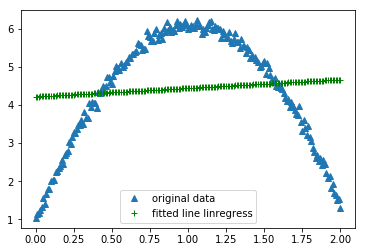

In [3]:
# try to perform a linear interpolation (it does not work properly, why ?)
# you can use stats.linregress or linear_model.LinearRegression

slope = 0 #need to compute!
intercept = 0 #need to compute!
r_value = 0 #need to compute!

slope, intercept, r_value, p_value, std_err = stats.linregress(x[:,0], y[:,0])

print('slope (linregress): ', slope,'  intercept (lnregress):', intercept)
print('correlation coefficient:', r_value)

plt.plot(x[:,0], y[:,0], '^', label='original data')
plt.plot(x[:,0], intercept + slope*x[:,0], 'g+', label='fitted line linregress')
plt.legend()

**risposta** 

come si vede dal fit il modello lineare non emula l'andamento dei dai in quanto essi seguono un andamento quadratico. Tale informazione è ricavabile anche dal fatto che la correlazione viene molto prossima a 0

initial position:  [0.96499498]   initial speed: 10.024380403461107  gravity acceleration: 9.800141094131419
correlation coefficient: 0.9977953125219581


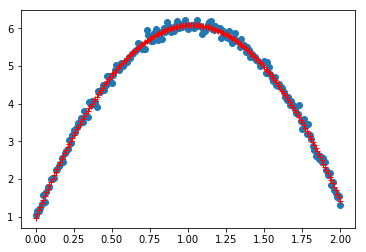

In [4]:
# use polynomial regression (the feature vectors have three components:
# they contain all 1s (for bias), the input data $x$ and their squared values $x^2$
# for the regression you can use linear_model.LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

dataX = np.zeros([201,3])
dataX[:,0]=1
dataX[:,1]=x[:,0]
dataX[:,2]=x[:,0]**2

h = 0 #need to compute!
v = 0 #need to compute!
g = 0 #need to compute!
sc = 0 #need to compute!


reg = LinearRegression()
reg.fit(dataX,y)

coefficienti=reg.coef_.reshape(3,1)

ypredicted=np.zeros(len(dataX))

for i in range(len(dataX)):
    ypredicted[i]=np.dot(dataX[i],coefficienti) + reg.intercept_
   

plt.plot(x[:,0], y[:,0], 'o', label='original data')
plt.plot(x[:,0],ypredicted,'r+',label='fit')

h=reg.intercept_
v=reg.coef_[0,1]
g=-2*reg.coef_[0,2]
sc=reg.score(dataX,y)
print('initial position: ', h,'  initial speed:', v, ' gravity acceleration:', g )
# reg.score produces the square of the correlation coefficient
print('correlation coefficient:', np.sqrt(sc))

# Question

Explain what do you conclude looking at the linear and polynomial fitting.

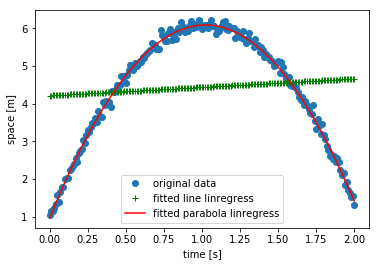

In [5]:
# plot the input data and the estimated models
plt.plot(x[:,0], y[:,0], 'o', label='original data')
plt.plot(x[:,0], intercept + slope*x[:,0], 'g+', label='fitted line linregress')
plt.plot(x[:,0], h + v*x[:,0] - 0.5*g*(x[:,0]**2), 'r', label='fitted parabola linregress')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('space [m]')
plt.show()


**risposta**

osservando il grafico che riporta il fit lineare e polinomiale si evince che il modello polinomiale predice molto meglio i dati. Questo è dovuto al fatto che la caduta di un corpo sottoposto alla forza di gravita è descritta da una legge quadratica e quindi non è possibile descrivere i dati attraverso una legge lineare